In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [5]:
# 어머니 연령
# 마지막 생리 기간 무게
# 인종 (1 = 흰색, 2 = 검정, 3 = 기타)
# 임신 중 흡연 상태 (1 = 예, 0 = 아니오) 흡연
# 조기 노동의 역사 (0 = 없음 1 = 1 등) PTL
# 고혈압 병력 (1 = 예, 0 = 아니오)
# 자궁 감응성의 존재 (1 = 예, 0 = 아니오) UI
# 첫 번째 삼량 체 FTV 동안 의사 방문 횟수 (0 = 없음, 1 = 1, 2 = 2 등)
# 체중
# 저체중아 (0 = 출생 체중> = 2500g, LOW 1 = 출생 체중 <2500g)

data = pd.read_csv(
    './dataset/logistic.txt', 
    skiprows=11, 
    delimiter=',', 
    dtype=np.float32, 
    names=['age','lwt','race','smoke','ptl','ht','ui','ftv','bwt','low']
)
data.head()

,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt,low
0,19.0,182.0,2.0,0.0,0.0,0.0,1.0,0.0,2523.0,0.0
1,33.0,155.0,3.0,0.0,0.0,0.0,0.0,3.0,2551.0,0.0
2,20.0,105.0,1.0,1.0,0.0,0.0,0.0,1.0,2557.0,0.0
3,21.0,108.0,1.0,1.0,0.0,0.0,1.0,2.0,2594.0,0.0
4,18.0,107.0,1.0,1.0,0.0,0.0,1.0,0.0,2600.0,0.0


In [6]:
train_size=math.floor(0.8*len(data))
train_data, test_data = data.head(train_size), data.tail(len(data)-train_size)

In [7]:
train_data.head()

,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt,low
0,19.0,182.0,2.0,0.0,0.0,0.0,1.0,0.0,2523.0,0.0
1,33.0,155.0,3.0,0.0,0.0,0.0,0.0,3.0,2551.0,0.0
2,20.0,105.0,1.0,1.0,0.0,0.0,0.0,1.0,2557.0,0.0
3,21.0,108.0,1.0,1.0,0.0,0.0,1.0,2.0,2594.0,0.0
4,18.0,107.0,1.0,1.0,0.0,0.0,1.0,0.0,2600.0,0.0


In [8]:
# test_data.head()

In [9]:
del train_data['lwt']
del train_data['bwt']
del test_data['lwt']
del test_data['bwt']

t_x = train_data.ix[:,:-1].values
t_y = train_data.ix[:,-1].values
t_y = t_y.reshape(t_y.shape[0], 1)
print(t_x.shape)
print(t_y.shape)
# t_x
# t_y

tt_x = test_data.ix[:,:-1].values
tt_y = test_data.ix[:,-1].values
tt_y = tt_y.reshape(tt_y.shape[0], 1)

(151, 7)
(151, 1)


In [18]:
len(t_x[0])

7

In [30]:
X = tf.placeholder(tf.float32, [None, 7])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([7, 1]), tf.float32)
# W = tf.get_variable('W', shape=[7,1], initializer=tf.contrib.layers.xavier_initializer())
B = tf.Variable(tf.random_normal([1]), tf.float32)

In [31]:
L = tf.matmul(X,W)+B
H = tf.sigmoid(L)
# entropy 
C = -tf.reduce_mean(
    (Y * tf.log(H)) 
    + 
    ((1-Y) * tf.log(1-H))
)

In [37]:
T = tf.train.GradientDescentOptimizer(0.01).minimize(C)
# T = tf.train.AdamOptimizer(0.01).minimize(C)

In [38]:
P = tf.cast(H > 0.5, tf.float32)
A = tf.reduce_mean(tf.cast(tf.equal(P, Y), tf.float32))

In [39]:
history = {
    'weight' : [],
    'cost' : [],
}

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(10000):
    _, c, w = sess.run([T, C, W], feed_dict={X: t_x, Y: t_y})
    
    history['weight'].append(w)
    history['cost'].append(c)
    
    if epoch % 300 == 0:
        print(c)

0.48175
0.359233
0.340623
0.335318
0.334128
0.333939
0.333919
0.333918
0.333918
0.333918
0.333918
0.333918
0.333919
0.333918
0.33392
0.333918
0.333918
0.333918
0.333918
0.333918
0.33392
0.333918
0.333918
0.333918
0.333918
0.33394
0.333918
0.333918
0.333918
0.333918
0.333918
0.333918
0.333918
0.333926


       cost    weight
0  0.481750 -0.230967
1  0.476758 -0.224963
2  0.476808 -0.220949
3  0.475930 -0.217935
4  0.473528 -0.215281


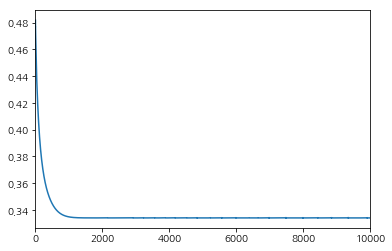

[0.86754966]

In [41]:
# .plot(kind='scatter', x='w_people', y='cost', ax=axes[0], grid=1)
# history
res = pd.DataFrame(history)
res.weight = res.weight.map(lambda x: x.mean())
print(res.head())

res.cost.plot()
plt.show()

# tt_x
a = sess.run([A], feed_dict={X: t_x, Y: t_y})
# history['accuracy'].append(a)
a
# plt.plot(np.linspace(0.,1.,len(res.cost)), a)
# plt.show()

In [42]:
sess.close()